This work is licensed under the Creative Commons Attribution-NonCommercial 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/3.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

# Dictionaries

This chapter presents another built-in type called a dictionary. Dictionaries are one of
Python’s best features; they are the building blocks of many efficient and elegant algorithms.


### 11.1 A dictionary is a mapping

A **dictionary** is like a list, but more general. In a list, the indices have to be integers; in a
dictionary they can be (almost) any type.

A dictionary contains a collection of indices, which are called **keys**, and a collection of
values. Each key is associated with a single value. The association of a key and a value is
called a **key-value pair** or sometimes an **item**.

In mathematical language, a dictionary represents a **mapping** from keys to values, so you
can also say that each key “maps to” a value. As an example, we’ll build a dictionary that
maps from English to Spanish words, so the keys and the values are all strings.

The function dict creates a new dictionary with no items. Because dict is the name of a
built-in function, you should avoid using it as a variable name.

In [ ]:
eng2sp = dict()
eng2sp

The squiggly-brackets, {}, represent an empty dictionary. To add items to the dictionary,
you can use square brackets:

In [ ]:
eng2sp['one'] = 'uno'

This line creates an item that maps from the key 'one' to the value 'uno'. If we print the
dictionary again, we see a key-value pair with a colon between the key and value:

In [ ]:
eng2sp

This output format is also an input format. For example, you can create a new dictionary
with three items:

In [ ]:
eng2sp = {'one': 'uno', 'two': 'dos', 'three': 'tres'}

But if you print eng2sp, you might be surprised:

In [ ]:
eng2sp

The order of the key-value pairs might not be the same. If you type the same example
on your computer, you might get a different result. In general, the order of items in a
dictionary is unpredictable.

But that’s not a problem because the elements of a dictionary are never indexed with integer
indices. Instead, you use the keys to look up the corresponding values:

In [ ]:
eng2sp['two']

The key 'two' always maps to the value 'dos' so the order of the items doesn’t matter.

If the key isn’t in the dictionary, you get an exception:

In [ ]:
eng2sp['four']

The len function works on dictionaries; it returns the number of key-value pairs:

In [ ]:
len(eng2sp)

The in operator works on dictionaries, too; it tells you whether something appears as a key
in the dictionary (appearing as a value is not good enough).

In [ ]:
'one' in eng2sp

In [ ]:
'uno' in eng2sp

To see whether something appears as a value in a dictionary, you can use the method
values, which returns a collection of values, and then use the in operator:

In [ ]:
vals = eng2sp.values()
'uno' in vals

The in operator uses different algorithms for lists and dictionaries. For lists, it searches the
elements of the list in order, as in Section 8.6. As the list gets longer, the search time gets
longer in direct proportion.

For dictionaries, Python uses an algorithm called a **hashtable** that has a remarkable property:
the in operator takes about the same amount of time no matter how many items are
in the dictionary. I explain how that’s possible in Section B.4, but the explanation might
not make sense until you’ve read a few more chapters.


### 11.2 Dictionary as a collection of counters

Suppose you are given a string and you want to count how many times each letter appears.
There are several ways you could do it:

1. You could create 26 variables, one for each letter of the alphabet. Then you could traverse
the string and, for each character, increment the corresponding counter, probably
using a chained conditional.<br><br>
2. You could create a list with 26 elements. Then you could convert each character to
a number (using the built-in function ord), use the number as an index into the list,
and increment the appropriate counter.<br><br>
3. You could create a dictionary with characters as keys and counters as the corresponding
values. The first time you see a character, you would add an item to the dictionary.
After that you would increment the value of an existing item.<br>

Each of these options performs the same computation, but each of them implements that
computation in a different way.

An **implementation** is a way of performing a computation; some implementations are
better than others. For example, an advantage of the dictionary implementation is that we
don’t have to know ahead of time which letters appear in the string and we only have to
make room for the letters that do appear.

Here is what the code might look like:

In [ ]:
def histogram(s):
    d = dict()
    for c in s:
        if c not in d:
            d[c] = 1
        else:
            d[c] += 1
    return d

The name of the function is histogram, which is a statistical term for a collection of counters
(or frequencies).

The first line of the function creates an empty dictionary. The for loop traverses the string.
Each time through the loop, if the character c is not in the dictionary, we create a new item
with key c and the initial value 1 (since we have seen this letter once). If c is already in the
dictionary we increment d[c].

Here’s how it works:

In [ ]:
h = histogram('brontosaurus')
h

The histogram indicates that the letters 'a' and 'b' appear once; 'o' appears twice, and
so on.

Dictionaries have a method called get that takes a key and a default value. If the key
appears in the dictionary, get returns the corresponding value; otherwise it returns the
default value. For example:

In [ ]:
h = histogram('a')
h

In [ ]:
h.get('a', 0)

In [ ]:
h.get('b', 0)

As an exercise, use get to write histogram more concisely. You should be able to eliminate
the if statement.

### 11.3 Looping and dictionaries

If you use a dictionary in a for statement, it traverses the keys of the dictionary. For example,
print_hist prints each key and the corresponding value:

In [ ]:
def print_hist(h):
    for c in h:
        print(c, h[c])


Here’s what the output looks like:

Again, the keys are in no particular order. To traverse the keys in sorted order, you can use
the built-in function sorted:

In [ ]:
def print_hist(h):
    for key in sorted(h):
        print(key, h[key])

h = histogram('parrot')
print_hist(h)

11.4 Reverse lookup

Given a dictionary d and a key k, it is easy to find the corresponding value v = d[k]. This
operation is called a **lookup**.

But what if you have v and you want to find k? You have two problems: first, there might
be more than one key that maps to the value v. Depending on the application, you might
be able to pick one, or you might have to make a list that contains all of them. Second,
there is no simple syntax to do a **reverse lookup**; you have to search.

Here is a function that takes a value and returns the first key that maps to that value:

In [ ]:
def reverse_lookup(d, v):
    for k in d:
        if d[k] == v:
            return k
    raise LookupError()

This function is yet another example of the search pattern, but it uses a feature we haven’t
seen before, raise. The **raise statement** causes an exception; in this case it causes a
LookupError, which is a built-in exception used to indicate that a lookup operation failed.

If we get to the end of the loop, that means v doesn’t appear in the dictionary as a value, so
we raise an exception.

Here is an example of a successful reverse lookup:

In [ ]:
h = histogram('parrot')
key = reverse_lookup(h, 2)
key

And an unsuccessful one:

In [ ]:
key = reverse_lookup(h, 3)

The effect when you raise an exception is the same as when Python raises one: it prints a
traceback and an error message.

The raise statement can take a detailed error message as an optional argument. For example:

In [ ]:
raise LookupError('value does not appear in the dictionary')

A reverse lookup is much slower than a forward lookup; if you have to do it often, or if the
dictionary gets big, the performance of your program will suffer.


### 11.5 Dictionaries and lists

Lists can appear as values in a dictionary. For example, if you are given a dictionary that
maps from letters to frequencies, you might want to invert it; that is, create a dictionary
that maps from frequencies to letters. Since there might be several letters with the same
frequency, each value in the inverted dictionary should be a list of letters.

Here is a function that inverts a dictionary:

In [ ]:
def invert_dict(d):
    inverse = dict()
    for key in d:
        val = d[key]
        if val not in inverse:
            inverse[val] = [key]
        else:
            inverse[val].append(key)
    return inverse

Each time through the loop, key gets a key from d and val gets the corresponding value.
If val is not in inverse, that means we haven’t seen it before, so we create a new item and
initialize it with a **singleton** (a list that contains a single element). Otherwise we have seen
this value before, so we append the corresponding key to the list.

Here is an example:

In [ ]:
hist = histogram('parrot')
hist

In [ ]:
inverse = invert_dict(hist)
inverse

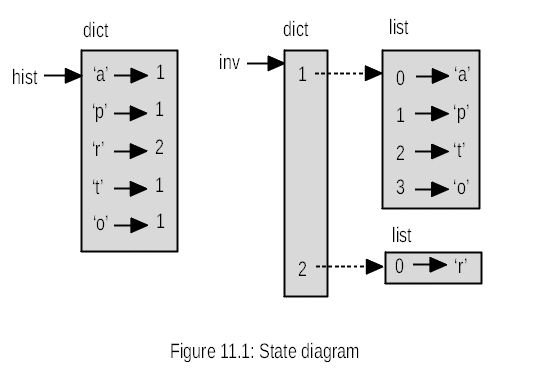
Figure 11.1 is a state diagram showing hist and inverse. A dictionary is represented as a
box with the type dict above it and the key-value pairs inside. If the values are integers,
floats or strings, they are drawn inside the box, but usually lists are drawn outside the box, just
to keep the diagram simple.

Lists can be values in a dictionary, as this example shows, but they cannot be keys. Here’s
what happens if you try:

In [ ]:
t = [1, 2, 3]
d = dict()
d[t] = 'oops'

It was mentioned earlier that a dictionary is implemented using a hashtable and that means that
the keys have to be **hashable**.

A **hash** is a function that takes a value (of any kind) and returns an integer. Dictionaries
use these integers, called hash values, to store and look up key-value pairs.

This system works fine if the keys are immutable. But if the keys are mutable, like lists,
bad things happen. For example, when you create a key-value pair, Python hashes the key
and stores it in the corresponding location. If you modify the key and then hash it again, it
would go to a different location. In that case you might have two entries for the same key,
or you might not be able to find a key. Either way, the dictionary wouldn’t work correctly.

That’s why keys have to be hashable, and why mutable types like lists aren’t. The simplest
way to get around this limitation is to use tuples, which we will see in the next chapter.

Since dictionaries are mutable, they can’t be used as keys, but they can be used as values.


### 11.6 Memos

If you played with the fibonacci function from Section 6.7, you might have noticed that
the bigger the argument you provide, the longer the function takes to run. Furthermore,
the run time increases quickly.
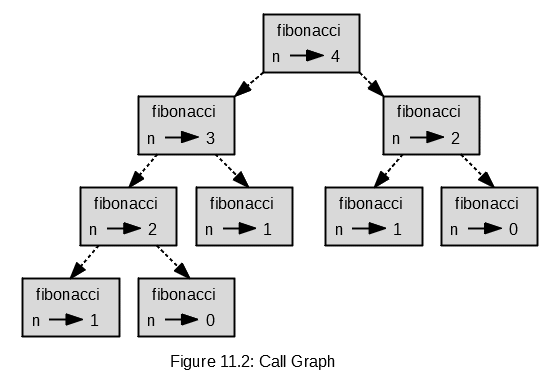
To understand why, consider Figure 11.2, which shows the **call graph** for fibonacci with
n=4:

A call graph shows a set of function frames, with lines connecting each frame to the frames
of the functions it calls. At the top of the graph, fibonacci with n=4 calls fibonacci with
n=3 and n=2. In turn, fibonacci with n=3 calls fibonacci with n=2 and n=1. And so on.

Count how many times fibonacci(0) and fibonacci(1) are called. This is an inefficient
solution to the problem, and it gets worse as the argument gets bigger.

One solution is to keep track of values that have already been computed by storing them
in a dictionary. A previously computed value that is stored for later use is called a **memo**.
Here is a “memoized” version of fibonacci:

In [ ]:
known = {0:0, 1:1}
def fibonacci(n):
    if n in known:
        return known[n]
    res = fibonacci(n-1) + fibonacci(n-2)
    known[n] = res
    return res

known is a dictionary that keeps track of the Fibonacci numbers we already know. It starts
with two items: 0 maps to 0 and 1 maps to 1.

Whenever fibonacci is called, it checks known. If the result is already there, it can return
immediately. Otherwise it has to compute the new value, add it to the dictionary, and
return it.

If you run this version of fibonacci and compare it with the original, you will find that it
is much faster.


### 11.7 Global variables

In the previous example, known is created outside the function, so it belongs to the special
frame called \_\_main\_\_. Variables in \_\_main\_\_ are sometimes called **global** because they
can be accessed from any function. Unlike local variables, which disappear when their
function ends, global variables persist from one function call to the next.

It is common to use global variables for **flags**; that is, boolean variables that indicate (“flag”)
whether a condition is true. For example, some programs use a flag named verbose to
control the level of detail in the output:

In [ ]:
verbose = True

def example1():
    if verbose:
        print('Running example1')

example1()

If you try to reassign a global variable, you might be surprised. The following example is
supposed to keep track of whether the function has been called:

In [ ]:
been_called = False

def example2():
    been_called = True # WRONG
    
example2()
been_called

But if you run it you will see that the value of been_called doesn’t change. The problem
is that example2 creates a new local variable named been_called. The local variable goes
away when the function ends, and has no effect on the global variable.

To reassign a global variable inside a function you have to **declare** the global variable before
you use it:

In [ ]:
been_called = False

def example2():
    global been_called
    been_called = True
    
example2()
been_called

The **global statement** tells the interpreter something like, “In this function, when I say
been_called, I mean the global variable; don’t create a local one.”

Here’s an example that tries to update a global variable:

In [ ]:
count = 0

def example3():
    count = count + 1 # WRONG

If you run it you get:

In [ ]:
example3()

Python assumes that count is local, and under that assumption you are reading it before
writing it. The solution, again, is to declare count global.

In [ ]:
def example3():
    global count
    count += 1
    
example3()
count

If a global variable refers to a mutable value, you can modify the value without declaring
the variable:

In [ ]:
known = {0:0, 1:1}

def example4():
    known[2] = 1

example4()
known

So you can add, remove and replace elements of a global list or dictionary, but if you want
to reassign the variable, you have to declare it:

In [ ]:
def example5():
    global known
    known = dict()
    
example5()
known

Global variables can be useful, but if you have a lot of them, and you modify them frequently,
they can make programs hard to debug.


### 11.8 Debugging

As you work with bigger datasets it can become unwieldy to debug by printing and checking
the output by hand. Here are some suggestions for debugging large datasets:

**Scale down the input:** If possible, reduce the size of the dataset. For example if the program
reads a text file, start with just the first 10 lines, or with the smallest example
you can find. You can either edit the files themselves, or (better) modify the program
so it reads only the first n lines.

If there is an error, you can reduce n to the smallest value that manifests the error, and
then increase it gradually as you find and correct errors.

**Check summaries and types:** Instead of printing and checking the entire dataset, consider
printing summaries of the data: for example, the number of items in a dictionary or
the total of a list of numbers.

A common cause of runtime errors is a value that is not the right type. For debugging
this kind of error, it is often enough to print the type of a value.

**Write self-checks:** Sometimes you can write code to check for errors automatically. For
example, if you are computing the average of a list of numbers, you could check that
the result is not greater than the largest element in the list or less than the smallest.
This is called a “sanity check” because it detects results that are “insane”.

Another kind of check compares the results of two different computations to see if
they are consistent. This is called a “consistency check”.

**Format the output:** Formatting debugging output can make it easier to spot an error. We
saw an example in Section 6.9. Another tool you might find useful is the pprint module,
which provides a pprint function that displays built-in types in a more human-readable
format (pprint stands for “pretty print”).

Again, time you spend building scaffolding can reduce the time you spend debugging.


### 11.9 Glossary

**mapping:** A relationship in which each element of one set corresponds to an element of
another set.

**dictionary:** A mapping from keys to their corresponding values.

**key-value pair:** The representation of the mapping from a key to a value.

**item:** In a dictionary, another name for a key-value pair.

**key:** An object that appears in a dictionary as the first part of a key-value pair.

**value:** An object that appears in a dictionary as the second part of a key-value pair. This is
more specific than our previous use of the word “value”.

**implementation:** A way of performing a computation.

**hashtable:** The algorithm used to implement Python dictionaries.

**hash function:** A function used by a hashtable to compute the location for a key.

**hashable:** Atype that has a hash function. Immutable types like integers, floats and strings
are hashable; mutable types like lists and dictionaries are not.

**lookup:** A dictionary operation that takes a key and finds the corresponding value.

**reverse lookup:** A dictionary operation that takes a value and finds one or more keys that
map to it.

**raise statement:** A statement that (deliberately) raises an exception.

**singleton:** A list (or other sequence) with a single element.

**call graph:** A diagram that shows every frame created during the execution of a program,
with an arrow from each caller to each callee.

**memo:** A computed value stored to avoid unnecessary future computation.

**global variable:** A variable defined outside a function. Global variables can be accessed
from any function.

**global statement:** A statement that declares a variable name global.

**flag:** A boolean variable used to indicate whether a condition is true.

**declaration:** A statement like global that tells the interpreter something about a variable.


### 11.10 Exercises

#### Exercise 11.1. 
Write a function that reads the words in words.txt and stores them as keys in a
dictionary. It doesn’t matter what the values are. Then you can use the in operator as a fast way to
check whether a string is in the dictionary.

If you did Exercise 10.10, you can compare the speed of this implementation with the list in operator
and the bisection search.

#### Exercise 11.2. 
Read the documentation of the dictionary method setdefault and use it to write a
more concise version of invert_dict. 

Solution: http://thinkpython2.com/code/invert_dict.py .

#### Exercise 11.3. 
Memoize the Ackermann function from Exercise 6.2 and see if memoization
makes it possible to evaluate the function with bigger arguments. Hint: no. 
    
Solution: http://thinkpython2.com/code/ackermann_memo.py .

#### Exercise 11.4. 
If you did Exercise 10.7, you already have a function named has_duplicates that
takes a list as a parameter and returns True if there is any object that appears more than once in the
list.

Use a dictionary to write a faster, simpler version of has_duplicates. 

Solution: http://thinkpython2.com/code/has_duplicates.py .

#### Exercise 11.5. 
Two words are “rotate pairs” if you can rotate one of them and get the other (see
rotate_word in Exercise 8.5).

Write a program that reads a wordlist and finds all the rotate pairs. 

Solution: http://thinkpython2.com/code/rotate_pairs.py .

#### Exercise 11.6. 
Here’s another Puzzler from Car Talk (http: // www. cartalk. com/ content/
puzzlers ):

>This was sent in by a fellow named Dan O’Leary. He came upon a common one-syllable,
five-letter word recently that has the following unique property. When you remove the
first letter, the remaining letters form a homophone of the original word, that is a word
that sounds exactly the same. Replace the first letter, that is, put it back and remove
the second letter and the result is yet another homophone of the original word. And the
question is, what’s the word?<br><br>
Now I’m going to give you an example that doesn’t work. Let’s look at the five-letter
word, ‘wrack.’ W-R-A-C-K, you know like to ‘wrack with pain.’ If I remove the first
letter, I am left with a four-letter word, ’R-A-C-K.’ As in, ‘Holy cow, did you see the
rack on that buck! It must have been a nine-pointer!’ It’s a perfect homophone. If you
put the ‘w’ back, and remove the ‘r,’ instead, you’re left with the word, ‘wack,’ which is
a real word, it’s just not a homophone of the other two words.<br><br>
But there is, however, at least one word that Dan and we know of, which will yield two
homophones if you remove either of the first two letters to make two, new four-letter
words. The question is, what’s the word?<br><br>

You can use the dictionary from Exercise 11.1 to check whether a string is in the word list.
To check whether two words are homophones, you can use the CMU Pronouncing Dictionary. 

You can download it from http://www.speech.cs.cmu.edu/cgi-bin/cmudict or from http://thinkpython2.com/code/c06d .

You can also download http://thinkpython2.com/code/pronounce.py , which provides a function named read_dictionary that reads the
pronouncing dictionary and returns a Python dictionary that maps from each word to a string that
describes its primary pronunciation.

Write a program that lists all the words that solve the Puzzler. 

Solution: http://thinkpython2.com/code/homophone.py .

Source material from:

Think Python<br>
How to Think Like a Computer Scientist<br>
2nd Edition, Version 2.2.23<br>
Allen Downey<br>
Copyright © 2015 Allen Downey. <br>
<br>
Source material used under the Creative Commons Attribution-NonCommercial 3.0 Unported License. To view a copy of this license, visit http://creativecommons.org/licenses/by-nc/3.0/ or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.


Adapted to Jupyter Notebooks with additional material by Warren Watts, Copyright © 2018